<a href="https://colab.research.google.com/github/JainAnvitha/AnvithJain-Colab/blob/master/kmeans_and_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import plotly.graph_objects as go
import random
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline
import sklearn.cluster.k_means_
from sklearn import mixture
import seaborn as sns
from pandas import ExcelWriter

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('drive/My Drive/crimeData.csv')
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13


In [0]:
# df['Text'] = df['Category'] + ', ' + df['PdDistrict']

In [0]:
print(df.loc[df['Category'].isin(['ROBBERY' , 'DRUG/NARCOTIC'])])

        IncidntNum  ...          PdId
16       160004241  ...  1.600000e+13
38       160009956  ...  1.600000e+13
94       160014836  ...  1.600000e+13
101      160015486  ...  1.600000e+13
112      160016951  ...  1.600000e+13
113      160016989  ...  1.600000e+13
150      160000625  ...  1.600000e+13
163      160019494  ...  1.600000e+13
197      160001388  ...  1.600000e+13
203      160022146  ...  1.600000e+13
375      160030553  ...  1.600000e+13
424      160293892  ...  1.600000e+13
426      160294191  ...  1.600000e+13
523      160040245  ...  1.600000e+13
526      160037101  ...  1.600000e+13
635      160046152  ...  1.600000e+13
692      160044792  ...  1.600000e+13
704      160049786  ...  1.600000e+13
787      160019513  ...  1.600000e+13
791      160060992  ...  1.600000e+13
853      160063786  ...  1.600000e+13
871      160049441  ...  1.600000e+13
946      160043584  ...  1.600000e+13
970      160046964  ...  1.600000e+13
1042     160075963  ...  1.600000e+13
1070     160

In [0]:
print(df.loc[df['Category'] == 'ROBBERY'])

        IncidntNum  ...          PdId
16       160004241  ...  1.600000e+13
38       160009956  ...  1.600000e+13
94       160014836  ...  1.600000e+13
101      160015486  ...  1.600000e+13
112      160016951  ...  1.600000e+13
113      160016989  ...  1.600000e+13
150      160000625  ...  1.600000e+13
163      160019494  ...  1.600000e+13
197      160001388  ...  1.600000e+13
203      160022146  ...  1.600000e+13
375      160030553  ...  1.600000e+13
424      160293892  ...  1.600000e+13
426      160294191  ...  1.600000e+13
523      160040245  ...  1.600000e+13
526      160037101  ...  1.600000e+13
635      160046152  ...  1.600000e+13
692      160044792  ...  1.600000e+13
704      160049786  ...  1.600000e+13
787      160019513  ...  1.600000e+13
791      160060992  ...  1.600000e+13
853      160063786  ...  1.600000e+13
871      160049441  ...  1.600000e+13
946      160043584  ...  1.600000e+13
970      160046964  ...  1.600000e+13
1042     160075963  ...  1.600000e+13
1070     160

In [0]:
ctg = df['Category'].unique().tolist()
mapping = dict( zip(ctg,range(len(ctg))) )
print(ctg)
print(mapping)
df.replace({'ctg': mapping},inplace=True)

ctg = []
for row in df['Category']:
    try:
        ctg.append(mapping[row])
    except:
        ctg.append(np.NaN)
df['Category'] = ctg
print(df['Category'])

['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT', 'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY', 'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC', 'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON', 'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS', 'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE', 'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING', 'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA', 'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT']
{'WEAPON LAWS': 0, 'WARRANTS': 1, 'NON-CRIMINAL': 2, 'ASSAULT': 3, 'OTHER OFFENSES': 4, 'MISSING PERSON': 5, 'LARCENY/THEFT': 6, 'BURGLARY': 7, 'STOLEN PROPERTY': 8, 'ROBBERY': 9, 'FRAUD': 10, 'DRUG/NARCOTIC': 11, 'VEHICLE THEFT': 12, 'RECOVERED VEHICLE': 13, 'VANDALISM': 14, 'ARSON': 15, 'PROSTITUTION': 16, 'SECONDARY CODES': 17, 'SUSPICIOUS OCC': 18, 'DRUNKENNE

In [0]:
DayOfWeek = df['DayOfWeek'].unique().tolist()
# print(df['DayOfWeek'])
mapping = dict( zip(DayOfWeek,range(len(DayOfWeek))) )
print(mapping)

#df.replace({'DayOfWeek': mapping},inplace=True)
df.DayOfWeek.map(mapping)

DayOfWeek = []
for row in df['DayOfWeek']:
    try:
        DayOfWeek.append(mapping[row])
    except:
        DayOfWeek.append(np.NaN)
df['DayOfWeek'] = DayOfWeek
print(df['DayOfWeek'])

{'Friday': 0, 'Monday': 1, 'Tuesday': 2, 'Saturday': 3, 'Thursday': 4, 'Sunday': 5, 'Wednesday': 6}
0         0
1         0
2         1
3         2
4         0
5         0
6         3
7         3
8         3
9         0
10        0
11        3
12        1
13        4
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
150470    3
150471    5
150472    3
150473    3
150474    1
150475    1
150476    2
150477    1
150478    5
150479    0
150480    1
150481    1
150482    1
150483    3
150484    2
150485    1
150486    2
150487    5
150488    1
150489    5
150490    2
150491    5
150492    5
150493    0
150494    4
150495    0
150496    0
150497    4
150498    0
150499    0
Name: DayOfWeek, Length: 150500, dtype: int64


In [0]:
PdDistrict = df['PdDistrict'].unique().tolist()
# print(df['PdDistrict'])
mapping = dict( zip(PdDistrict,range(len(PdDistrict))) )
print(mapping)

#df.replace({'PdDistrict': mapping},inplace=True)
df.PdDistrict.map(mapping)

PdDistrict = []
for row in df['PdDistrict']:
    try:
        PdDistrict.append(mapping[row])
    except:
        PdDistrict.append(np.NaN)
df['PdDistrict'] = PdDistrict
print(df['PdDistrict'])

{'SOUTHERN': 0, 'BAYVIEW': 1, 'TENDERLOIN': 2, 'MISSION': 3, 'NORTHERN': 4, 'TARAVAL': 5, 'INGLESIDE': 6, 'CENTRAL': 7, 'RICHMOND': 8, 'PARK': 9, nan: 10}
0         0
1         0
2         1
3         2
4         3
5         4
6         0
7         2
8         0
9         1
10        5
11        5
12        1
13        6
14        7
15        0
16        3
17        3
18        6
19        0
20        4
21        4
22        3
23        3
24        8
25        5
26        3
27        4
28        3
29        6
         ..
150470    4
150471    8
150472    0
150473    7
150474    0
150475    7
150476    0
150477    7
150478    0
150479    9
150480    7
150481    5
150482    5
150483    2
150484    0
150485    0
150486    7
150487    5
150488    3
150489    0
150490    1
150491    0
150492    3
150493    3
150494    1
150495    9
150496    7
150497    7
150498    7
150499    0
Name: PdDistrict, Length: 150500, dtype: int64


In [0]:
Location = df['Location'].unique().tolist()
# print(df['Location'])
mapping = dict( zip(Location,range(len(Location))) )
print(mapping)

#df.replace({'Location': mapping},inplace=True)
df.Location.map(mapping)

Location = []
for row in df['Location']:
    try:
        Location.append(mapping[row])
    except:
        Location.append(np.NaN)
df['Location'] = Location
print(df['Location'])

{'(37.775420706711, -122.403404791479)': 0, '(37.7299809672996, -122.388856204292)': 1, '(37.7857883766888, -122.412970537591)': 2, '(37.7650501214668, -122.419671780296)': 3, '(37.788018555829, -122.426077177375)': 4, '(37.7808789360214, -122.405721454567)': 5, '(37.7839805592634, -122.411778295992)': 6, '(37.7757876218293, -122.393357241451)': 7, '(37.7209669615499, -122.387181635995)': 8, '(37.7644781578695, -122.477376524003)': 9, '(37.7457389429655, -122.477960327299)': 10, '(37.7356970275482, -122.37675765553)': 11, '(37.7292705199592, -122.432325871028)': 12, '(37.791642982384, -122.40090869889)': 13, '(37.7837069301545, -122.408595110869)': 14, '(37.7572895904578, -122.406870402082)': 15, '(37.7489063051829, -122.420354780861)': 16, '(37.715765426995, -122.439909766772)': 17, '(37.7835699386918, -122.408421116922)': 18, '(37.7736186276456, -122.422315670749)': 19, '(37.7928412840447, -122.424519835009)': 20, '(37.7540986882068, -122.414233849038)': 21, '(37.7714939969416, -122.

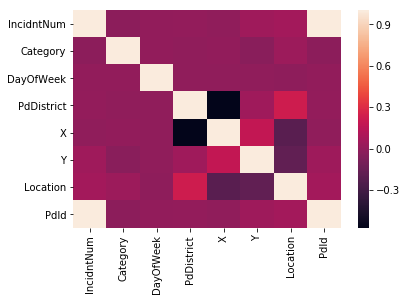

In [0]:
corr = df.corr()
sns.heatmap(corr)

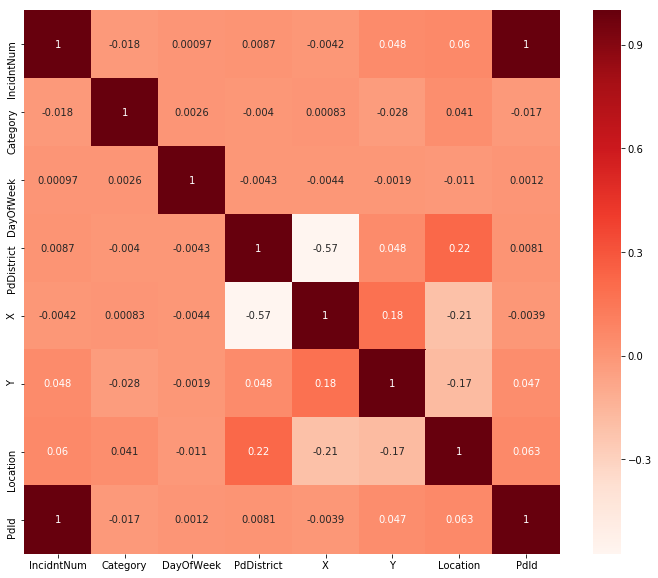

In [0]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

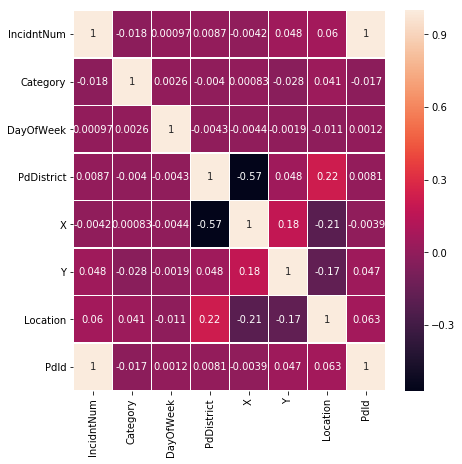

In [0]:
Cor = df[['IncidntNum','Category', 'Descript', 'DayOfWeek','Date','Time','PdDistrict','Resolution','Address','X','Y','Location',
          'PdId']] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
 #Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(cor,annot=True,linewidths=.5, ax=ax)

In [0]:
#Correlation with output variable
cor_target = abs(cor["PdId"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

IncidntNum    0.99887
PdId          1.00000
Name: PdId, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor["Location"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Location    1.0
Name: Location, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

,IncidntNum,Category,DayOfWeek,PdDistrict,X,Y,Location,PdId
IncidntNum,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.99887
Category,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeek,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
PdDistrict,NaN,NaN,NaN,1.00000,0.57311,NaN,NaN,NaN
X,NaN,NaN,NaN,0.57311,1.00000,NaN,NaN,NaN
Y,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Location,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
PdId,0.99887,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


In [0]:
df.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [0]:
lat = []
lon = []
for row in df['Location']:
    try:
        lat.append(row.split(',')[0].strip('('))
        lon.append(row.split(',')[1].strip(')'))
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)
df['X'] = lat
df['Y'] = lon
df.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,0,POSS OF PROHIBITED WEAPON,0,1/29/16 0:00,11:00,0,"ARREST, BOOKED",800 Block of BRYANT ST,NaN,NaN,0,1.200000e+13
1,120058272,0,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",0,1/29/16 0:00,11:00,0,"ARREST, BOOKED",800 Block of BRYANT ST,NaN,NaN,0,1.200000e+13
2,141059263,1,WARRANT ARREST,1,4/25/16 0:00,14:59,1,"ARREST, BOOKED",KEITH ST / SHAFTER AV,NaN,NaN,1,1.410000e+13


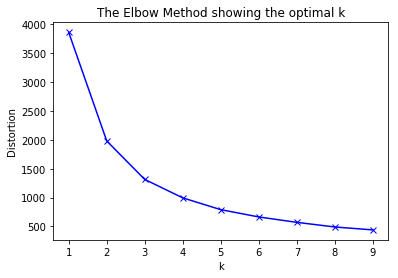

In [0]:
X = np.array(list(zip(df.loc[:,'Category'],df.loc[:,'Location'])))
# X = np.array(list(zip(df.loc[:,'Category'],df.loc[:,'Location'],df.loc[:,'DayOfWeek'],df.loc[:,'PdDistrict']))).reshape(-1,1)
# .reshape(len(df.loc[:,'Category']),4) added to remove error in gmm

# k means determine k
distortions=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

K value is between 3-4

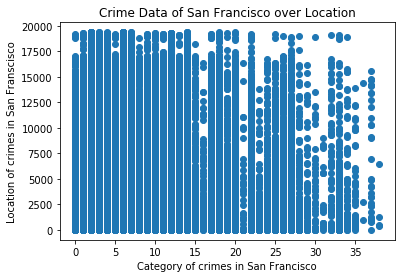

In [0]:
# scatter plot
x=np.array(df['Category'].values) 
y=np.array(df['Location'].values)

plt.title('Crime Data of San Francisco over Location')
plt.xlabel('Category of crimes in San Francisco')
plt.ylabel('Location of crimes in San Franscisco')
plt.scatter(x, y)
plt.show()

In [0]:
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,0,POSS OF PROHIBITED WEAPON,0,1/29/16 0:00,11:00,0,"ARREST, BOOKED",800 Block of BRYANT ST,NaN,NaN,0,1.200000e+13
1,120058272,0,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",0,1/29/16 0:00,11:00,0,"ARREST, BOOKED",800 Block of BRYANT ST,NaN,NaN,0,1.200000e+13


In [0]:
# df.head(50)


### **KMM**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


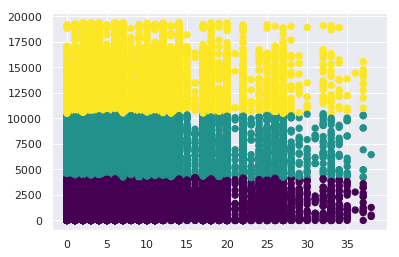

In [0]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, crime_data, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

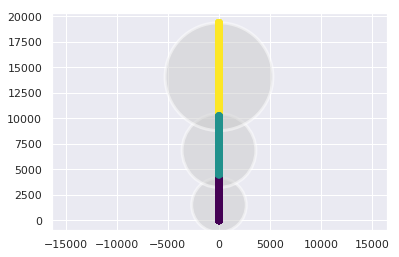

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)

In [0]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

Error in callback <function flush_figures at 0x7fb0256fb400> (for post_execute):


KeyboardInterrupt: ignored

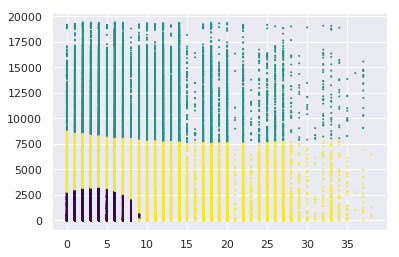

In [0]:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
# GMM 
from sklearn.mixture import GaussianMixture
x=np.array(df['Category'].values) 
y=np.array(df['Location'].values)
X=np.array(list(zip(df.loc[:,'Category'],df.loc[:,'Location'])))
gmm_sklearn = GaussianMixture(n_components = 3)
gmm_sklearn.fit(X)
labels = gmm_sklearn.predict(X)
plt.scatter(x, y, c=labels, s=1, cmap='viridis') 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from scipy.spatial.distance import cdist
import pylab as pl

In [0]:
# from sklearn.mixture import GaussianMixture
# def doGMM(X, nclust=3):
#     model = GaussianMixture(n_components=nclust)
#     model.fit(X)
#     clust_labels3 = model.predict(X)
#     return (clust_labels3)

# clust_labels3 = doGMM(X,3)
# gmm = pd.DataFrame(clust_labels3)
# X.insert(X,(X.shape[1]),'gmm',gmm)


# fig = plt.figure(figsize=(20, 8))
# ax = fig.add_subplot(111)
# scatter = ax.scatter(X['Category'],X['Location'],
#                      c=gmm[0],s=50)
# ax.set_title('GMM Clustering for Category VS Location')
# ax.set_xlabel('Category')
# ax.set_ylabel('Location')
# plt.colorbar(scatter)

In [0]:
probs = gmm_sklearn.predict_proba(X)
print(probs[:5].round(3))

[[0.933 0.002 0.065]
 [0.933 0.002 0.065]
 [0.962 0.001 0.037]
 [0.974 0.001 0.025]
 [0.974 0.001 0.025]]


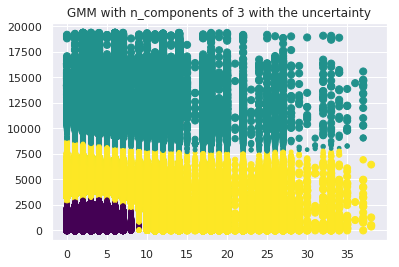

In [0]:
size = 50 * probs.max(1) ** 2 # squared is for the uncertainty, emphasizes the differences
plt.title('GMM with n_components of 3 with the uncertainty')
plt.scatter(X[:,0], X[:,1], c=labels, s=size, cmap='viridis');

In [0]:
print(X)


[[   0    0]
 [   0    0]
 [   1    1]
 ...
 [   6  939]
 [   6 3475]
 [   4    0]]


In [0]:
print(X[:,0])

[0 0 1 ... 6 6 4]


In [0]:
print(X[:,1])

[   0    0    1 ...  939 3475    0]


In [0]:
# draw ellipsoids
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

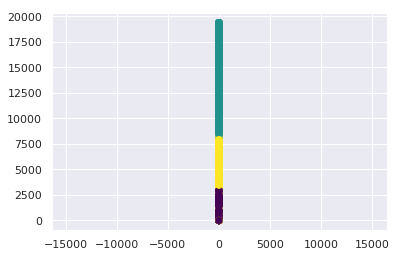

In [0]:
gmm = GaussianMixture(n_components=3).fit(X) # spherical
plot_gmm(gmm, X)